In [279]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-price-prediction/Data Dictionary - carprices.xlsx
/kaggle/input/car-price-prediction/CarPrice_Assignment.csv


In [280]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,r2_score,mean_squared_error



In [281]:
df=pd.read_csv('../input/car-price-prediction/CarPrice_Assignment.csv')
df=df.drop(['car_ID'],axis=1)

In [282]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [283]:
df['CarName'] = df['CarName'].str.split(' ',expand=True)

In [284]:
df['CarName'] = df['CarName'].replace({'maxda':'mazda','nissan':'Nissan','porcshce':'porsche','toyouta':'toyota','vokswagen':'volkswagen','vw':'volkswagen'})

In [285]:
df['symboling']=df['symboling'].astype(str)

In [286]:
#checking for duplicates
df.loc[df.duplicated()]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [287]:
#segregation of numerical and categorical variable
num=df.select_dtypes(exclude=['object']).columns
cat=df.select_dtypes(include=['object']).columns
df_num=df[num]
df_cat=df[cat]

Text(0, 0.5, 'Count')

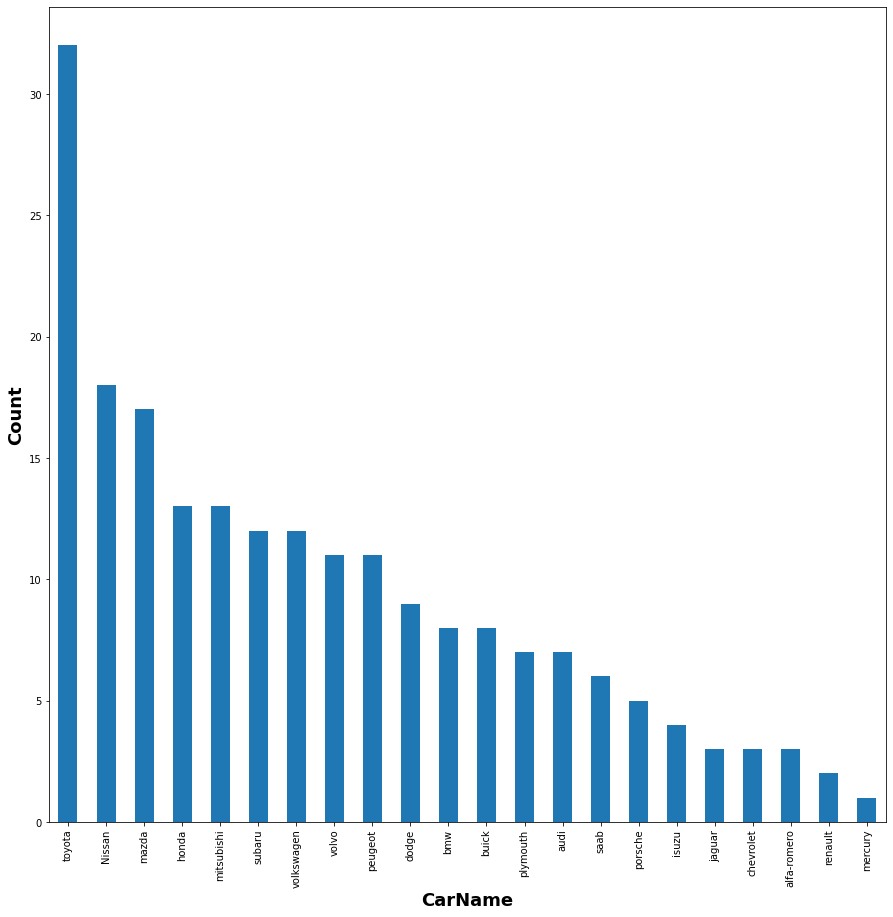

In [288]:
plt.figure(figsize=(15,15))
df_cat['CarName'].value_counts().plot(kind='bar')
plt.xlabel('CarName',fontweight='bold',fontsize=18)
plt.ylabel('Count',fontweight='bold',fontsize=18)

Toyota is the most selling car and
Mercury is least selling car

Text(0.5, 0, 'Price')

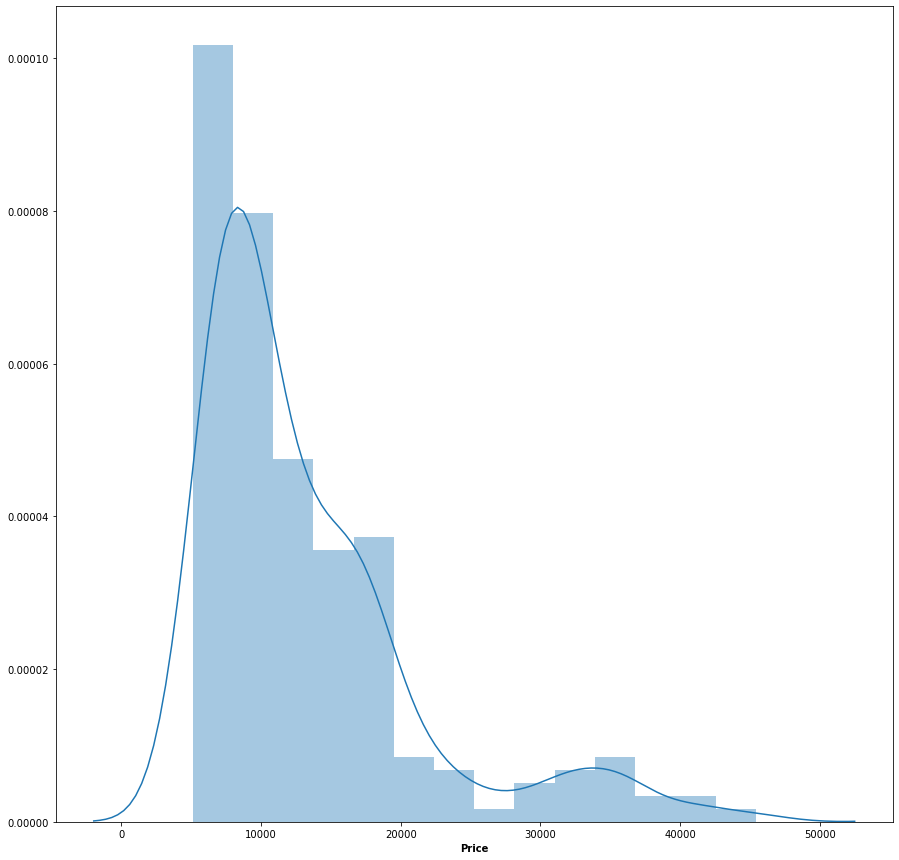

In [289]:
#visualisation of distribution of car price
plt.figure(figsize=(15,15))
sns.distplot(df['price'])
plt.xlabel('Price',fontweight='bold')

Price of most of the cars is below 18000

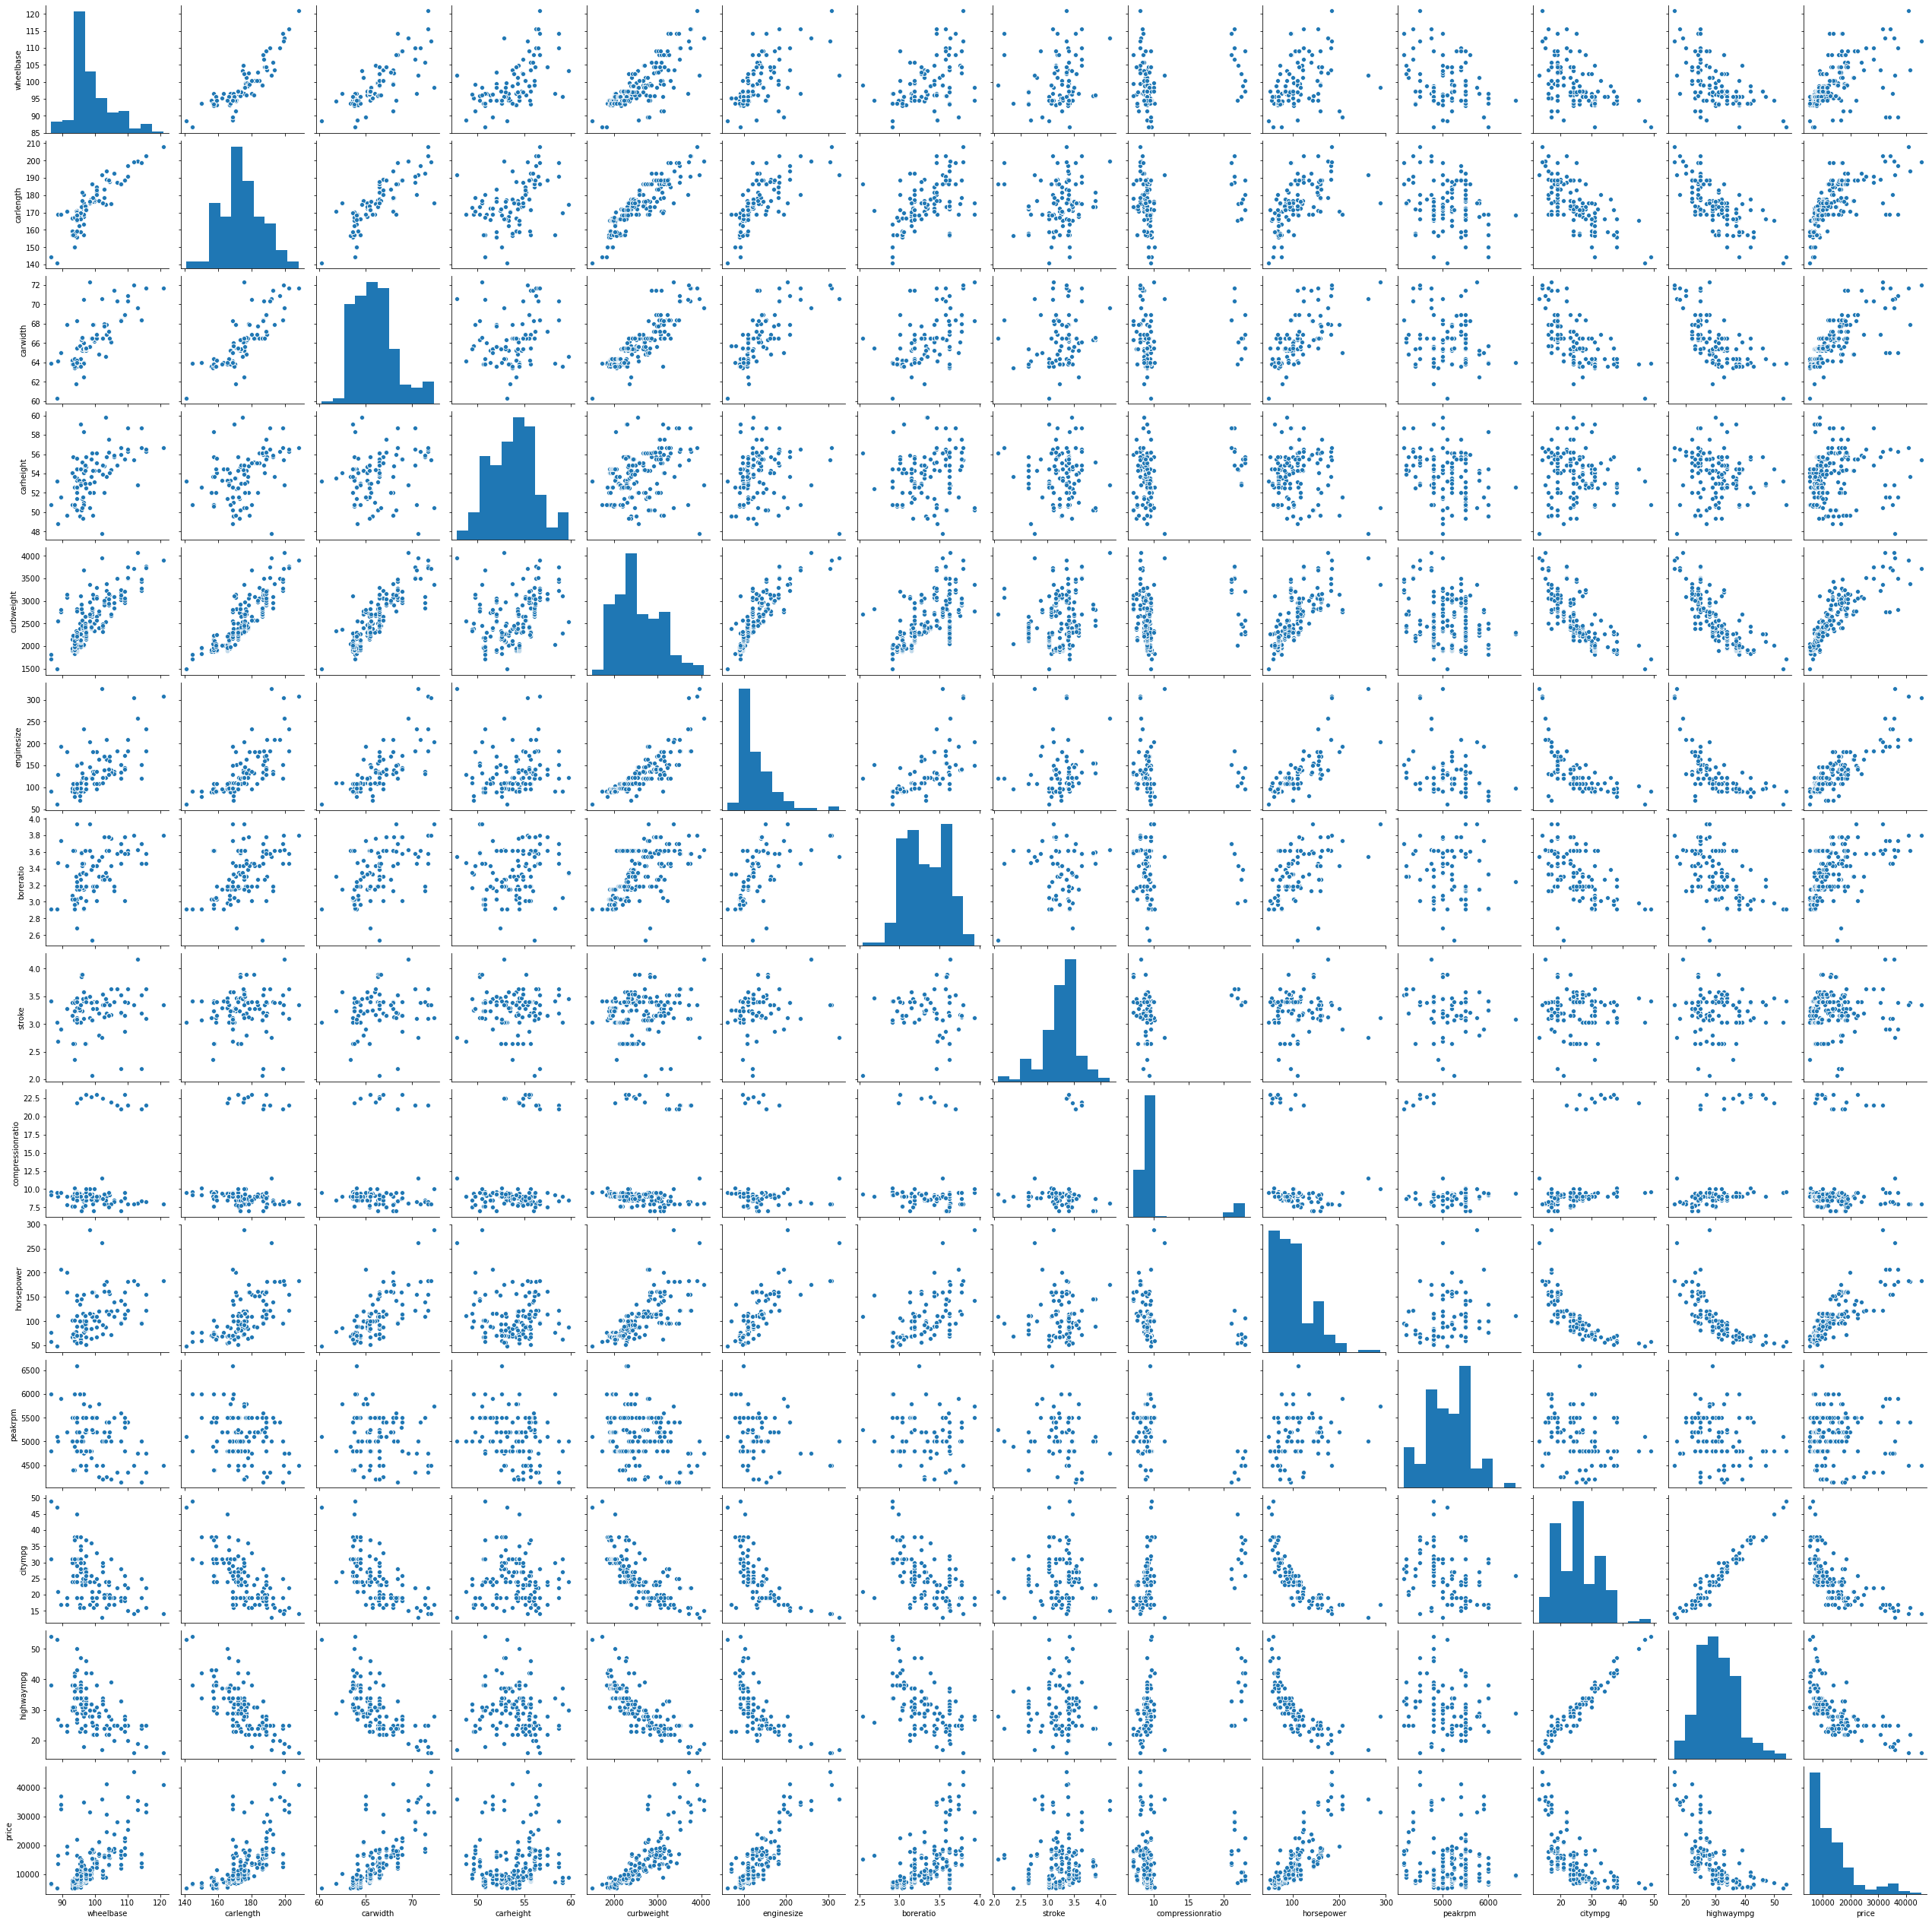

In [290]:
sns.pairplot(df_num)

wheelbase,carlength,carwidth,curbweight,enginesize,horsepower have a positive corr

citymgp,highwaymgp have negetive corr

In [291]:
df_cat.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'enginetype',
       'cylindernumber', 'fuelsystem'],
      dtype='object')

Text(0.5, 0, 'cylinder number')

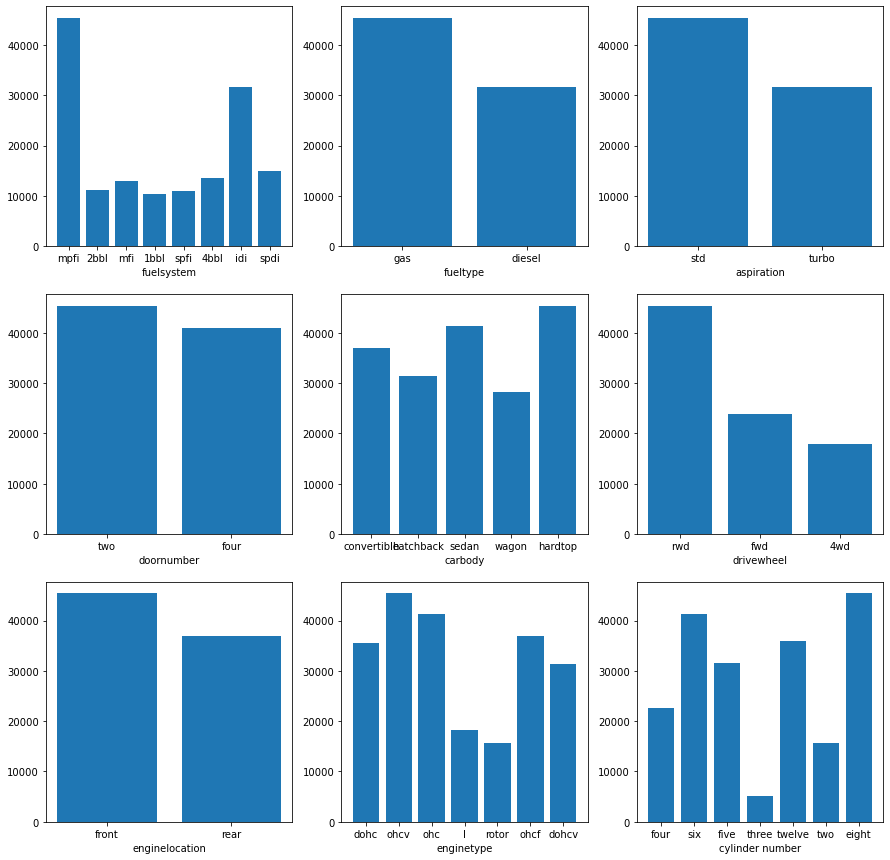

In [292]:
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
plt.bar(df['fuelsystem'],df['price'])
plt.xlabel('fuelsystem')
plt.subplot(3,3,2)
plt.bar(df['fueltype'],df['price'])
plt.xlabel('fueltype')
plt.subplot(3,3,3)
plt.bar(df['aspiration'],df['price'])
plt.xlabel('aspiration')
plt.subplot(3,3,4)
plt.bar(df['doornumber'],df['price'])
plt.xlabel('doornumber')
plt.subplot(3,3,5)
plt.bar(df['carbody'],df['price'])
plt.xlabel('carbody')
plt.subplot(3,3,6)
plt.bar(df['drivewheel'],df['price'])
plt.xlabel('drivewheel')
plt.subplot(3,3,7)
plt.bar(df['enginelocation'],df['price'])
plt.xlabel('enginelocation')
plt.subplot(3,3,8)
plt.bar(df['enginetype'],df['price'])
plt.xlabel('enginetype')
plt.subplot(3,3,9)
plt.bar(df['cylindernumber'],df['price'])
plt.xlabel('cylinder number')








1)cars with mpfi fuel system are expensive compared to any other fuel system 

2)Cars with fuel diesel are cheaper then cars with fueltype as gas

3)Cars with standard aspiration are more expensive than turbo 

4)there is not much price difference between cars with 2 doors and cars with 4 doors

5) Hardtop cars and are the most expensive followed by sedan,covertible,hatchback and wagon being the cheapest

6) right wheel driving cars are most expensive 

7)Cars having front engine are more expensive when compared to cars having rear engine

8)cars having ohcv have the highest price followed by ohc,ohcf,dohc,dohcv,I and rotor

9)Cars having 8 and 6 cylinders are almost of the same prie range.Cars having 5 and twelve cylinders are of the almost th same price range.

In [293]:
df_cat.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'enginetype',
       'cylindernumber', 'fuelsystem'],
      dtype='object')

In [294]:
x=df_num['price']
y=df_cat['fueltype']

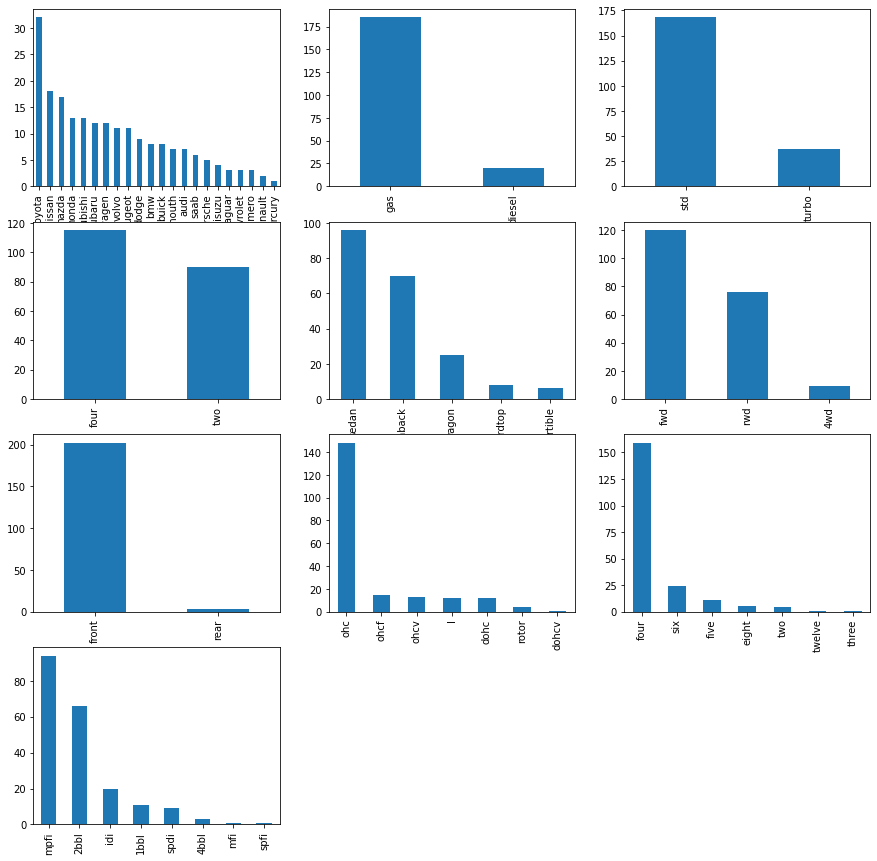

In [295]:
plt.figure(figsize=(15,15))
plt.subplot(4,3,1)
df_cat['CarName'].value_counts().plot(kind='bar')
plt.subplot(4,3,2)
df_cat['fueltype'].value_counts().plot(kind='bar')
plt.subplot(4,3,3)
df_cat['aspiration'].value_counts().plot(kind='bar')
plt.subplot(4,3,4)
df_cat['doornumber'].value_counts().plot(kind='bar')
plt.subplot(4,3,5)
df_cat['carbody'].value_counts().plot(kind='bar')
plt.subplot(4,3,6)
df_cat['drivewheel'].value_counts().plot(kind='bar')
plt.subplot(4,3,7)
df_cat['enginelocation'].value_counts().plot(kind='bar')
plt.subplot(4,3,8)
df_cat['enginetype'].value_counts().plot(kind='bar')
plt.subplot(4,3,9)
df_cat['cylindernumber'].value_counts().plot(kind='bar')
plt.subplot(4,3,10)
df_cat['fuelsystem'].value_counts().plot(kind='bar')



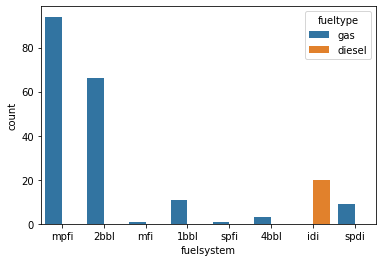

In [296]:
sns.countplot('fuelsystem',hue='fueltype',data=df_cat)

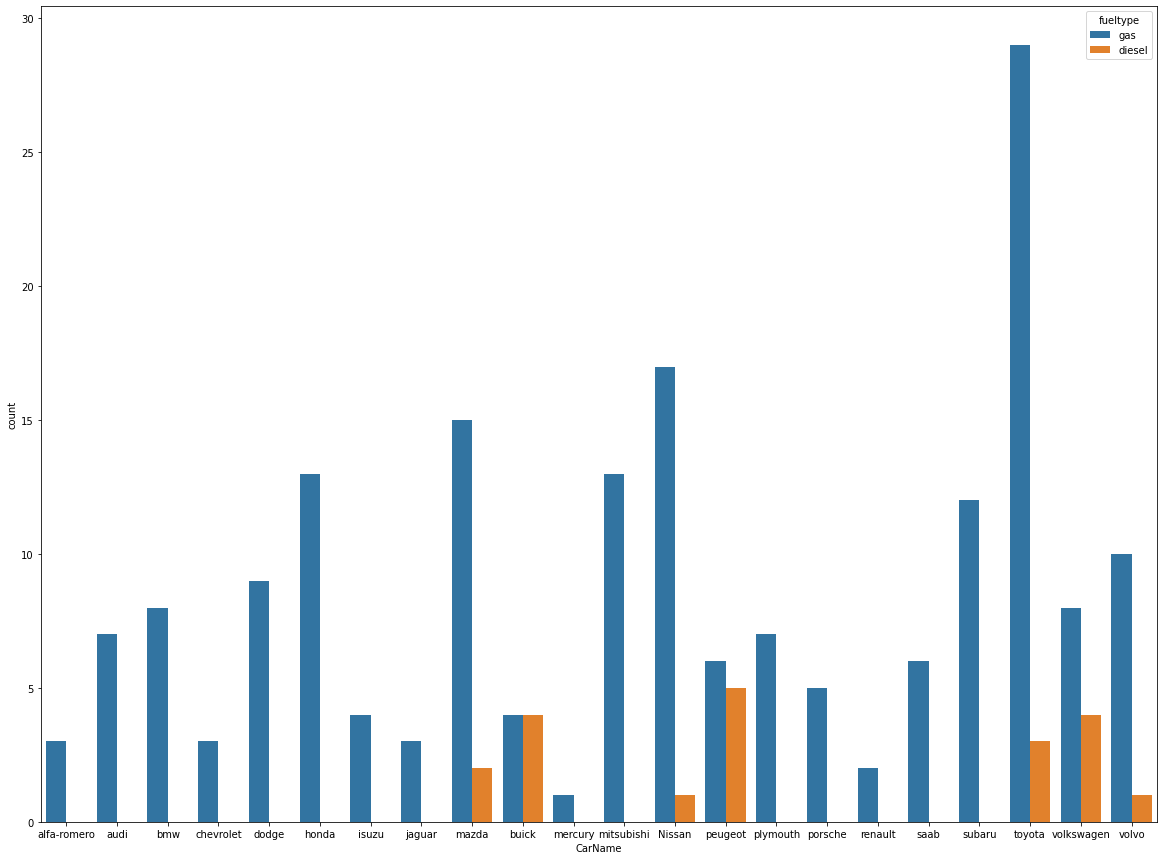

In [297]:
plt.figure(figsize=(20,15))
sns.countplot('CarName',hue='fueltype',data=df)

TOYOTA,NISSAN,MAZDA,HONDA CARS WHICH RUN ON GAS ARE THE MOST SELLING ONES

MAXIMUM OF THE CARS SOLD ARE GAS CARS

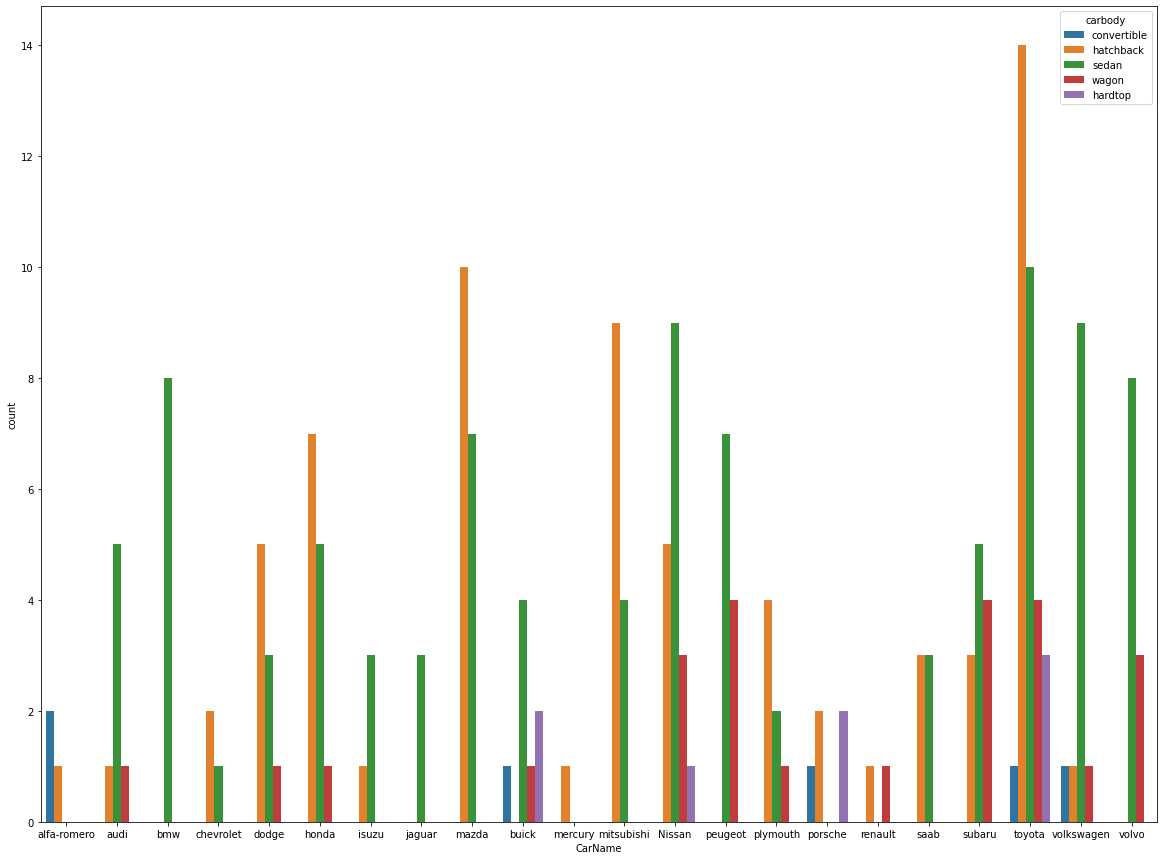

In [298]:
plt.figure(figsize=(20,15))
sns.countplot('CarName',hue='carbody',data=df_cat)

TOYOTA MAZDA AND MITSUBISHI ARE THE MOST SELLING CARS IN HATCHBACK CATEGORY


TOYOTA NISSAN VOLKSWAGEN AND BMW ARE THE MOST SELLING CARS IN SEDAN CATEGORY

CARS OF ALFA-ROMERO BUICK PORSCHE AND TOYOTA ARE THE LEAST SELLING CARS IN CONVERTIBLE CATEGORY

PEUGEOT SUBARU AND TOYOTA HAVE A FAIRLY BETTER SALE THAN COMPARED TO HONDA DODGE AUDI BUICK NISSAN RENAULT AND OTHER COMPANIES IN WAGON CATEGORY

HARDTOP CARS MANUFACTURED BY TOYOTA ARE THE HIGHEST SELLING CARS IN THE CATEGORY

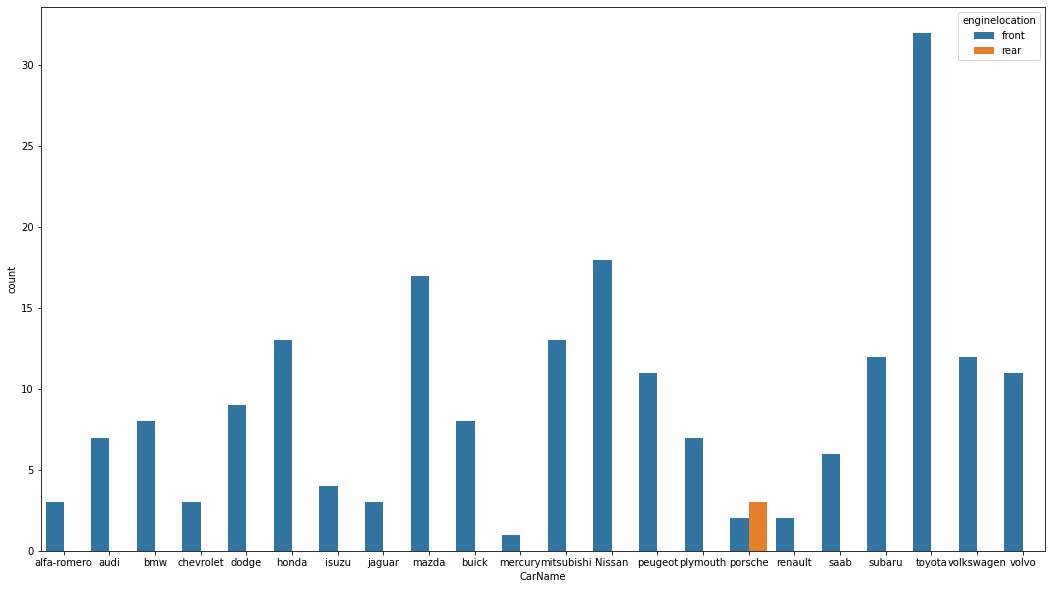

In [299]:
plt.figure(figsize=(18,10))
sns.countplot('CarName',hue='enginelocation',data=df_cat)

PORSCHE IS THE ONLY CAR HAVING A REAR ENGINE

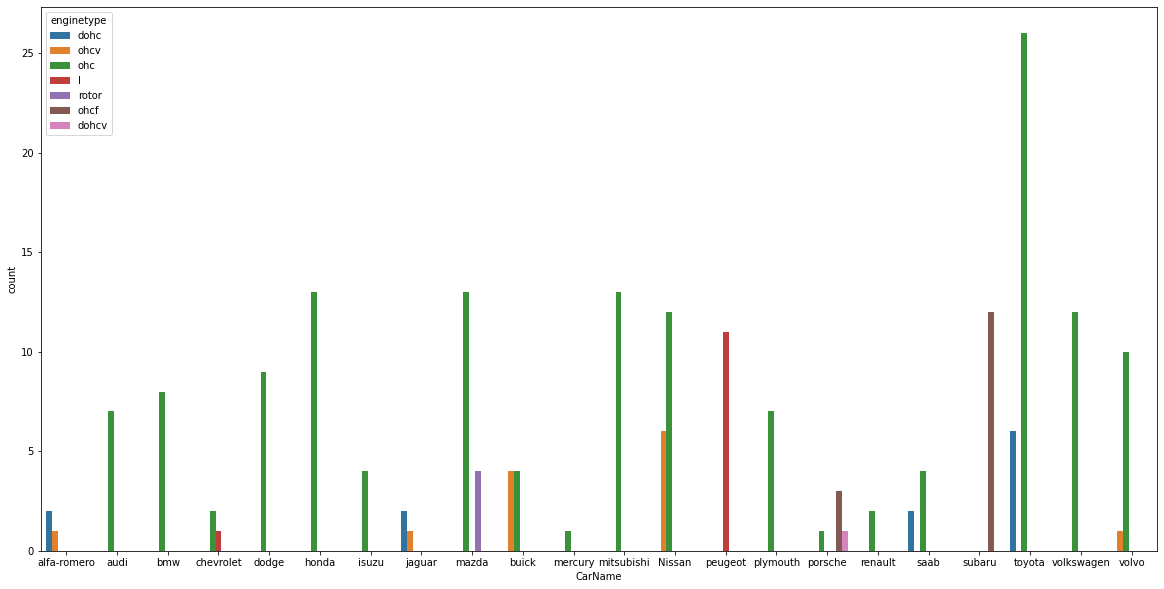

In [300]:
plt.figure(figsize=(20,10))
sns.countplot('CarName',hue='enginetype',data=df_cat)

CARS BELONGING TO TOYOTA HONDA MAZDA MITSIBUSHI AND NISSAN WITH OHC ENGINE ARE MOST SELLING CARS

CARS HAVING I ENGINE ARE THE LEAST SELLING CARS

Text(0, 0.5, 'Count')

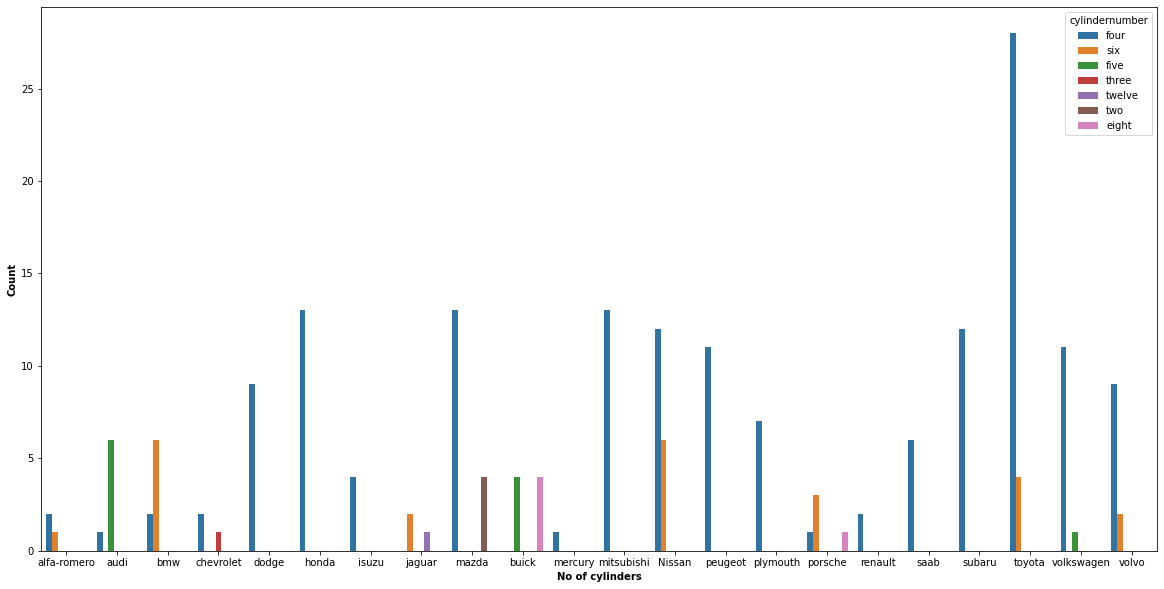

In [301]:
plt.figure(figsize=(20,10))
sns.countplot('CarName',hue='cylindernumber',data=df_cat)
plt.xlabel('No of cylinders',fontweight='bold')
plt.ylabel('Count',fontweight='bold')

CARS WITH 4 CYLINDERS ARE THE MOST COMMONLY SELLING CARS 

CARS WITH 3 CYLINDERS ARE THE LEAST COMMONLY SELLING CARS

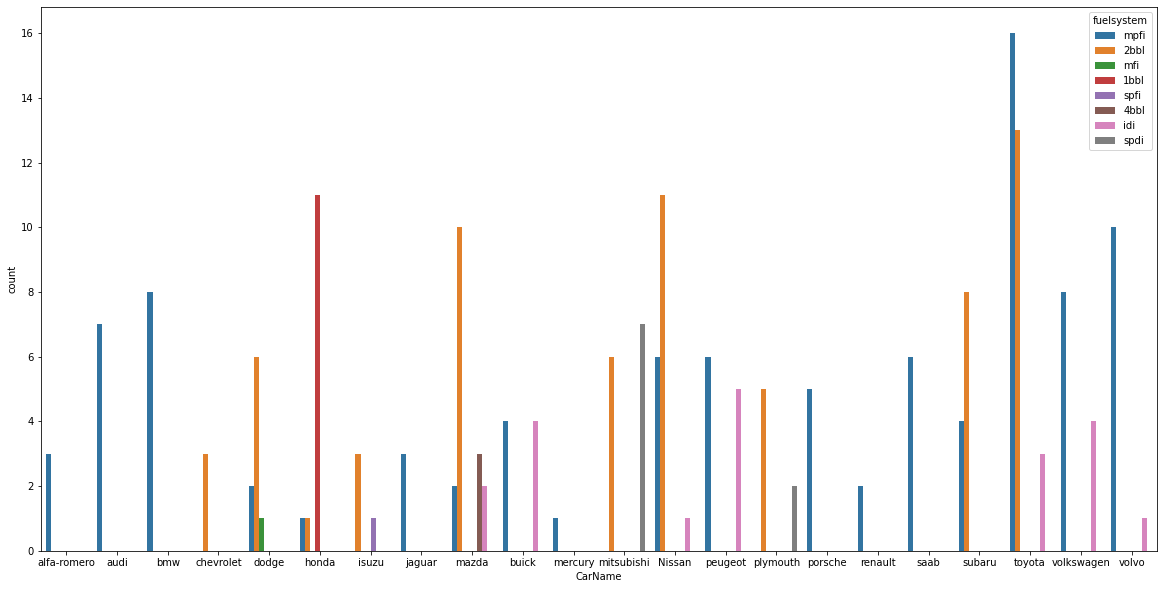

In [302]:
plt.figure(figsize=(20,10))
sns.countplot('CarName',hue='fuelsystem',data=df_cat)

MOST OF THE CARS USE MPFI OR A 2BBL FUEL SYSTEM 

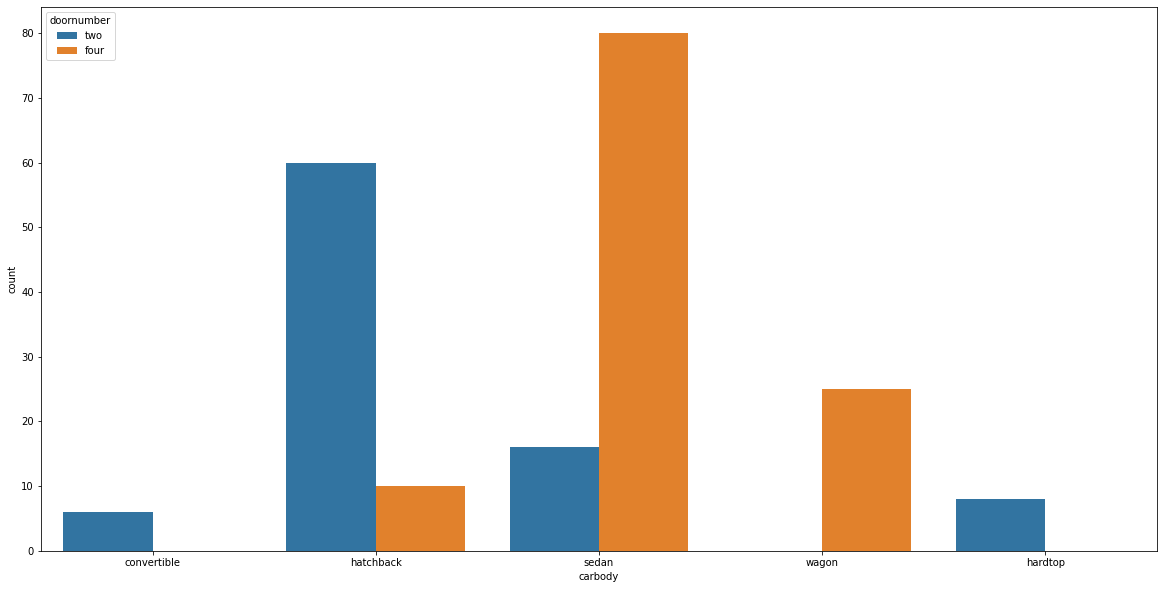

In [303]:
plt.figure(figsize=(20,10))
sns.countplot('carbody',hue='doornumber',data=df_cat)

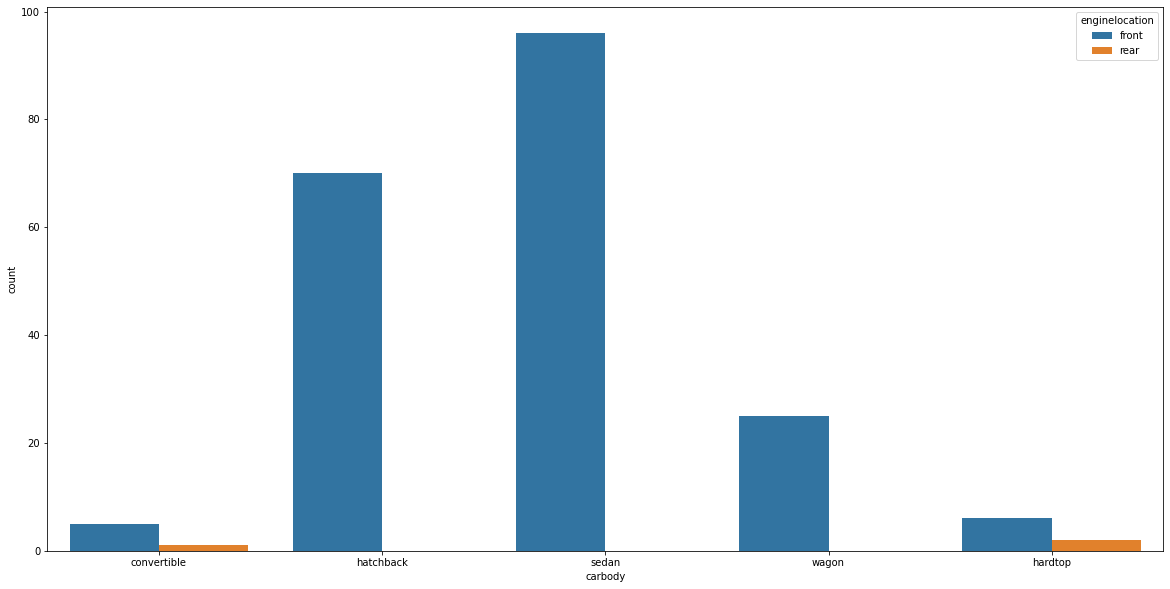

In [304]:
plt.figure(figsize=(20,10))
sns.countplot('carbody',hue='enginelocation',data=df_cat)

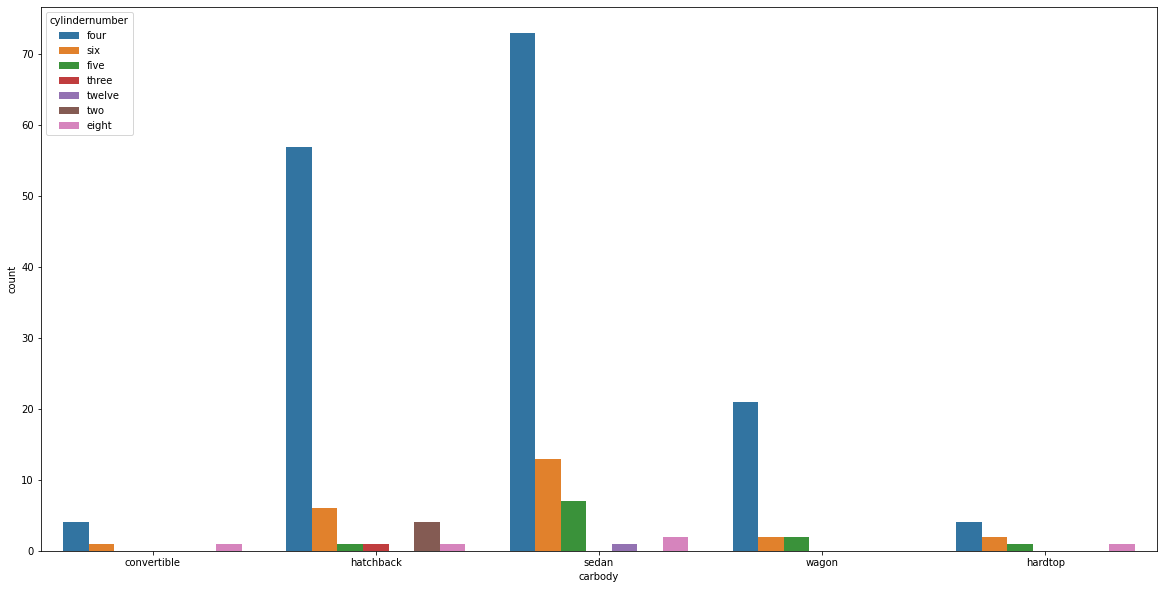

In [305]:
plt.figure(figsize=(20,10))
sns.countplot('carbody',hue='cylindernumber',data=df_cat)


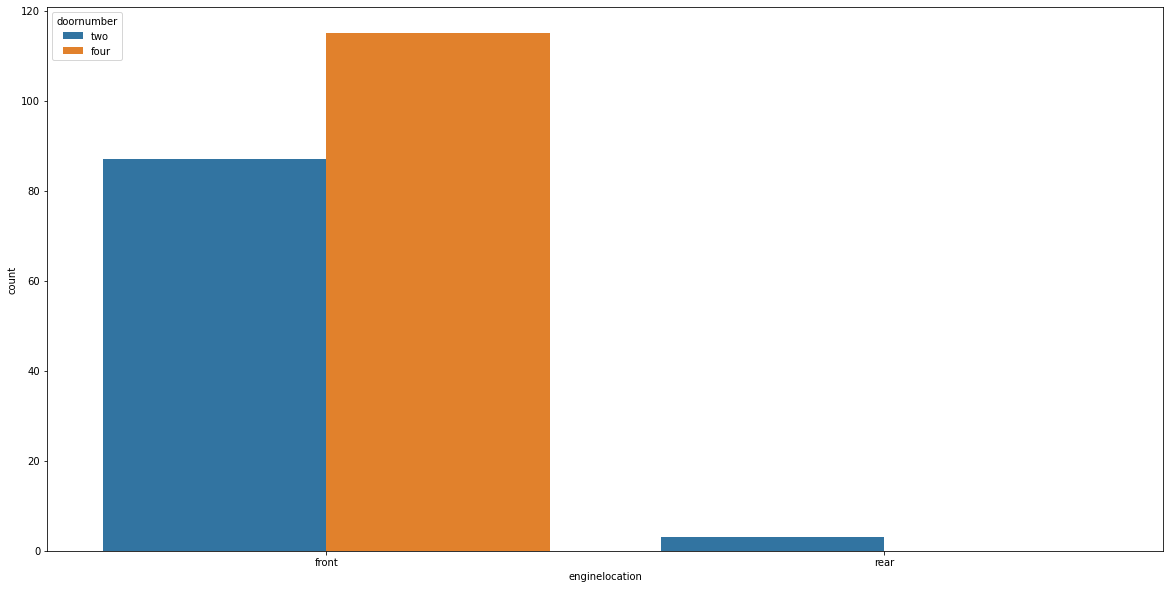

In [306]:
plt.figure(figsize=(20,10))
sns.countplot('enginelocation',hue='doornumber',data=df_cat)

In [307]:
df_cat.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'enginetype',
       'cylindernumber', 'fuelsystem'],
      dtype='object')

In [308]:
df_num.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [309]:
for i in range(0,len(df.price)):
    if df['price'][i] <= 15000:
        df.loc[i,'car'] = 'cheap'
    elif (df['price'][i] > 15000) & (df['price'][i] <= 30000):
        df.loc[i,'car'] = 'affordable'
    elif (df['price'][i] > 30000) & (df['price'][i] <= 45000):
        df.loc[i,'car'] = 'expensive'
    elif df['price'][i] > 45000:
        df.loc[i,'car'] = 'luxury'

In [310]:
col= ['wheelbase', 'carlength','carwidth','curbweight',
      'horsepower','citympg','boreratio','highwaympg',
      'enginetype','cylindernumber','enginesize',
      'fuelsystem', 'fueltype','aspiration','doornumber',
      'carbody', 'drivewheel', 'enginelocation','car','price']

In [311]:
df=df[col]

In [312]:
df=pd.get_dummies(df,drop_first=True)

In [313]:
df.columns

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'horsepower',
       'citympg', 'boreratio', 'highwaympg', 'enginesize', 'price',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'car_cheap', 'car_expensive',
       'car_luxury'],
      dtype='object')

In [314]:
col=['wheelbase', 'carlength', 'carwidth', 'curbweight', 'horsepower',
       'citympg', 'boreratio', 'highwaympg', 'enginesize',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'car_cheap', 'car_expensive',
       'car_luxury','price']
df=df[col]

In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   wheelbase              205 non-null    float64
 1   carlength              205 non-null    float64
 2   carwidth               205 non-null    float64
 3   curbweight             205 non-null    int64  
 4   horsepower             205 non-null    int64  
 5   citympg                205 non-null    int64  
 6   boreratio              205 non-null    float64
 7   highwaympg             205 non-null    int64  
 8   enginesize             205 non-null    int64  
 9   enginetype_dohcv       205 non-null    uint8  
 10  enginetype_l           205 non-null    uint8  
 11  enginetype_ohc         205 non-null    uint8  
 12  enginetype_ohcf        205 non-null    uint8  
 13  enginetype_ohcv        205 non-null    uint8  
 14  enginetype_rotor       205 non-null    uint8  
 15  cylind

In [316]:
y=df.iloc[:,41].values
x=df.iloc[:,0:41].values

In [317]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.20,random_state=0)

In [318]:
sc=StandardScaler()
train_x=sc.fit_transform(train_x)
test_x=sc.transform(test_x)


In [319]:
model=LinearRegression()
a=model.fit(train_x,train_y)
y_pred=model.predict(test_x)

In [320]:
y_pred

array([ 0.01345673,  1.03580369, -0.03017964,  0.17171152,  0.03200769,
        1.01156382,  0.00731531,  0.63060368,  0.82919276, -0.00592694,
        1.01966217,  1.45415841,  1.00103431,  0.94147248, -0.00173883,
        0.92506232,  0.01150139, -0.03416073,  0.07562618, -0.07830849,
        0.07263499,  0.88667065,  0.05845594,  0.85762562,  1.10374263,
       -0.32152333,  0.00538173,  0.96033154, -0.05072061,  0.10126725,
        0.0962508 ,  0.01156294,  0.94378646,  0.14029083,  0.01862429,
        1.12725931,  0.24095573,  0.18861828,  0.01006193,  1.25314123,
        0.07511201])

In [321]:
test_y

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0],
      dtype=uint8)

In [322]:
r2_score(y_pred,test_y)

0.8917470263755043

In [323]:
model.intercept_

0.3719512195121945

In [324]:
model.coef_

array([ 9.57354843e-02,  3.21682280e-02,  3.21321923e-02, -2.15527462e-01,
        1.19145803e-01, -1.82766416e-02,  5.97701938e-02,  4.86372023e-02,
        2.22115681e-02, -6.24500451e-17,  2.16675541e-02, -2.11388389e-02,
       -1.21556813e-01, -2.13124065e-02,  4.70580001e-03, -4.33390729e-02,
       -2.83120807e-02,  2.67187983e-02,  9.02056208e-17, -4.12067371e-03,
        4.70580001e-03, -1.84271301e-02,  1.32363915e-03,  1.59093158e-02,
       -6.00158770e-03, -2.70035445e-02,  1.40667411e-04,  2.29239077e-02,
       -1.59093158e-02, -2.11393284e-02,  3.04246676e-02, -2.91521003e-02,
       -1.36431083e-01, -1.35618240e-01, -7.71454800e-02, -3.80649663e-01])